In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
def obsids2txt(obsids,fname):
        f=open(fname,'w')
        f.write('\n'.join(map(str,list(obsids)) ))
        f.close()

In [3]:
wedgecut_and_rescut_obsids_path = '/nfs/eor-00/h1/beards/obs_lists/long_runs/wedge_cut_plus_res_cut.txt'

In [4]:
obsids = np.genfromtxt(wedgecut_and_rescut_obsids_path,dtype=int)

In [5]:
num_obsids_in_set = 100

In [6]:
spacings_hours = [0,.08,.4]

In [7]:
obsidsets = []
for spacing_hours in spacings_hours:
    print(spacing_hours)
    obsidset = [obsids[0]]
    for obsidi in range(num_obsids_in_set-1):
        #print('\t'+str(obsidi))
        obsid_distances_hours = (np.array(obsids)-obsidset[obsidi])/60./60
        good = np.where(obsid_distances_hours > spacing_hours)[0]
        currobsid = obsids[good[np.argmin(obsid_distances_hours[good])]]
        obsidset.append(currobsid)
    obsidsets.append(obsidset)
obsidsets = np.array(obsidsets)

0
0.08
0.4


In [19]:
for i in range(3):
    #print(float(max(obsidsets[i])-min(obsidsets[i]))/3600/24)
    t = Time(obsidsets[i], format='gps', scale='utc')
    print(np.unique(np.floor(t.jd)))
    print(len(np.unique(np.floor(t.jd))))

[ 2456528.  2456532.]
2
[ 2456528.  2456532.  2456538.  2456540.  2456542.]
5
[ 2456528.  2456532.  2456538.  2456540.  2456542.  2456545.  2456547.
  2456549.  2456553.  2456555.  2456566.  2456568.  2456570.  2456574.
  2456576.  2456581.  2456589.  2456591.  2456595.]
19


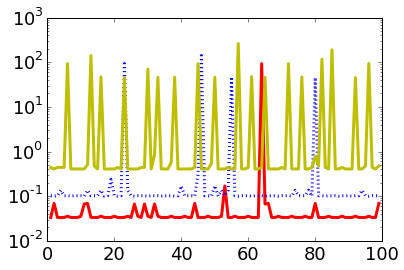

In [9]:
matplotlib.rcParams.update({'font.size': 18})

stys = ['r-','b:','y-','k:']
for obsidseti in range(len(spacings_hours)):
    plt.semilogy(1.*(obsidsets[obsidseti]-np.roll(obsidsets[obsidseti],1))/3600,stys[obsidseti],lw=3)

In [10]:
obsids2txt(obsidsets[0],'obsids_spaced_by_0hours.txt')
obsids2txt(obsidsets[1],'obsids_spaced_by_0_08hours.txt')
obsids2txt(obsidsets[2],'obsids_spaced_by_0_4hours.txt')

In [3]:
import imp
import mwa_utils
imp.reload(mwa_utils)
import commands
import numpy as np
import cPickle as pickle

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
matplotlib.rcParams.update({'font.size': 16})

In [5]:
# run on eor-09
# fhdcubesroot = '/nfs/mwa-03/r1/EoR2013/fhd_apb_EoR0_high_sem1_1/Healpix/'
# analysis_root = '/nfs/mwa-09/r1/abrahamn/21cmIR/21cmfreqavgcubes/'
analysis_root = '/home/abrahamn/xcor_data/21cmfreqavgcubes/'

In [6]:
fhdlabels = ['obsids_spaced_by_0hours','obsids_spaced_by_0_08hours','obsids_spaced_by_0_4hours']
fhdhumanlabels = ['3 hours spread over 1 night','3 hours spread over 5 nights','3 hours spread over 19 nights']

In [7]:
# n = 100
# dtheta_rad = 6./60*np.pi/180.
# angvals_rad = np.linspace(-dtheta_rad*n/2,dtheta_rad*((n-1.)/2.),n)

# dirty_xx0,counts_cube,weights_xx0,model_xx0,beam_squared_xx0 = mwa_utils.grid_fhd_cubes(freq_averaged_cubedat0, angvals_rad, 0, -27.*np.pi/180.)

In [8]:
# print(weights_xx0.shape)
# plt.imshow(counts_cube,interpolation='nearest',cmap='hot',vmax=3)
# plt.colorbar()

In [9]:
# weights_uv = np.abs(np.fft.fftshift(np.fft.fft2(weights_xx0)))
# weights_uv /= np.sum(weights_uv)
# plt.imshow(weights_uv,interpolation='nearest',cmap='jet')
# plt.colorbar()

In [10]:
300./185/1000*60*60

5.837837837837839

In [11]:
dtheta_amin = 6
# for i in range(len(fhdlabels)):
#     print('loading '+(fhdlabels[i]))
#     freq_averaged_cubedat0,freq_averaged_cubedat1 = mwa_utils.load_freq_averaged_odd_even_cubedat(fhdcubesroot,'Combined_obs_'+fhdlabels[i])
#     mwa_image = mwa_utils.MWAImage(freq_averaged_cubedat0,freq_averaged_cubedat1, dtheta_amin=dtheta_amin, n=120)    
#     pickle.dump( mwa_image, open( analysis_root+'Combined_obs_'+fhdlabels[i]+'_6amin.p', "wb" ) )

mwa_images = []
for i in range(len(fhdlabels[:16])):
    print('loading '+(str(i)))
    mwa_images.append(pickle.load( open( analysis_root+'Combined_obs_'+fhdlabels[i]+'_6amin.p', "rb" ) ))

loading 0
loading 1
loading 2


In [12]:
dtheta_amin = 6
fhddeeplabel = 'Combined_obs_wedge_cut_plus_res_cut'
# freq_averaged_cubedat0,freq_averaged_cubedat1 = mwa_utils.load_freq_averaged_odd_even_cubedat(fhdcubesroot,fhddeeplabel)
# mwa_image = mwa_utils.MWAImage(freq_averaged_cubedat0,freq_averaged_cubedat1, dtheta_amin=dtheta_amin, n=120)    
# pickle.dump( mwa_image, open( analysis_root+fhddeeplabel+'_6amin.p', "wb" ) )

mwa_deep_image = pickle.load( open( analysis_root+fhddeeplabel+'_6amin.p', "rb" ) )

lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545
lmag.max() = 2545


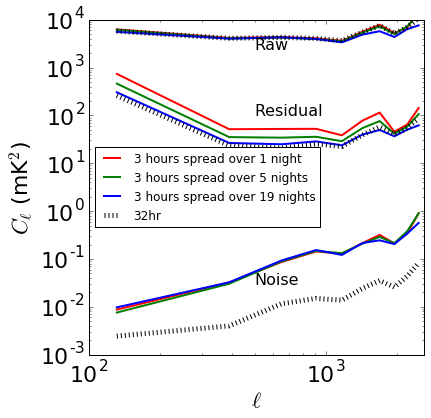

In [13]:
plt.figure(figsize=(6,6))

nbins = 10
lmax = 2600
cols = ['r','g','b']

# plot pointing integrations per day
for i in range(len(fhdlabels)):
    col = cols[i]
    lw = 2
    
    lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_images[i].dirty_xx_u0, mwa_images[i].weights_xx0, mwa_images[i].dtheta_rad,nbins,lmax,hann=False)
    lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].model_xx_u0, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    lbincenters, Cl_dirty_diff, bin_counts, bin_weights =  mwa_utils.img2PS(mwa_images[i].dirty_xx_u0 - mwa_images[i].dirty_xx_u1, mwa_images[i].weights_xx0,mwa_images[i].dtheta_rad, nbins,lmax, hann=False)
    
    plt.loglog(lbincenters,Cl_dirty0*1.e6,col,linewidth=lw)
    plt.loglog(lbincenters,Cl_res0*1.e6,col,linewidth=lw,label=fhdhumanlabels[i])
    plt.loglog(lbincenters,Cl_dirty_diff*1.e6,col,linewidth=lw)
    
lbincenters, Cl_dirty0, bin_counts, bin_weights = mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0, mwa_deep_image.weights_xx0, mwa_deep_image.dtheta_rad,nbins,lmax,hann=False)
lbincenters, Cl_res0, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.model_xx_u0, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad, nbins,lmax, hann=False)
lbincenters, Cl_dirty_diff, bin_counts, bin_weights =     mwa_utils.img2PS(mwa_deep_image.dirty_xx_u0 - mwa_deep_image.dirty_xx_u1, mwa_deep_image.weights_xx0,mwa_deep_image.dtheta_rad, nbins,lmax, hann=False)
plt.loglog(lbincenters,Cl_dirty0*1.e6,'k:',linewidth=5)
plt.loglog(lbincenters,Cl_res0*1.e6,'k:',linewidth=5,label='32hr')
plt.loglog(lbincenters,Cl_dirty_diff*1.e6,'k:',linewidth=5)

plt.text(500, 2500, 'Raw', fontsize=16)
plt.text(500, 100, 'Residual', fontsize=16)
plt.text(500, .03, 'Noise', fontsize=16)

matplotlib.rcParams.update({'font.size': 22})
plt.ylabel(r'$C_\ell$ (mK$^2$)')
plt.ylim([1.e-3,1.e4])
plt.xlim([1.e2,2600])
plt.legend(fontsize=12,loc=6)
plt.xlabel(r'$\ell$')

#plt.savefig('res_pspec_of_100_obsids_with_diff_spacings_6amin.pdf',bbox_inches='tight')